In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path_results= "outputs/" 
file_results="complete_results_10_June.xlsx"
radius="_13_3"
models_list=["LR",'GPR','SVR','KNR',"RF","XGB"]
output_path="figure/boxplot/"

In [7]:
MAE_dict=dict()
df_data=pd.read_excel(path_results+file_results).drop("Unnamed: 0", axis=1).set_index("name_model_radius")
for model in models_list:
    MAE_test_list=df_data.loc[model+radius]["Mae_test_list"][1:-1]
    MAE_test_list_float=[float(el) for el in MAE_test_list.split(",")]
    MAE_dict[model]=MAE_test_list_float

In [8]:
df_MAE=pd.DataFrame.from_dict(MAE_dict,orient='columns')
df_MAE

,LR,GPR,SVR,KNR,RF,XGB
0,28.704804,24.260053,30.910670,25.926959,25.023002,31.090107
1,41.415916,49.950933,45.334423,44.576758,46.403462,37.308552
2,40.873687,40.186519,32.223361,35.233511,38.220573,31.407579
3,51.962159,41.737687,46.260819,59.060494,44.436647,52.848529
4,38.613067,47.558460,41.961699,45.908735,41.350850,35.996870
5,34.611981,38.117728,29.542973,41.301171,34.142005,30.143311
6,38.994228,35.470254,41.188555,42.211111,44.755946,34.988901
7,50.516456,44.020193,33.493943,33.361654,36.212973,31.708177
8,43.442482,41.527472,37.298332,37.114815,37.547371,34.753067
9,39.331843,38.324183,33.492550,42.100310,36.699813,31.098168


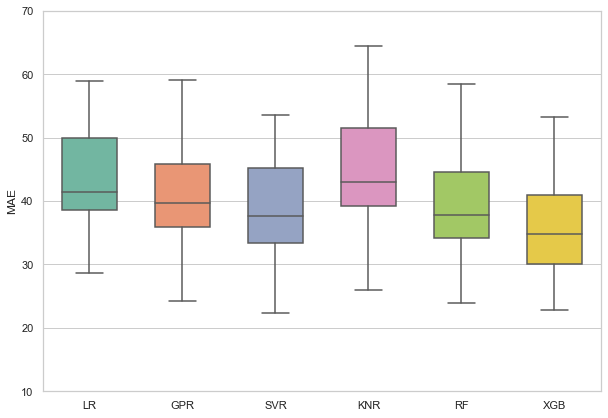

In [9]:
f = plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid",palette="Set2")    
sns.boxplot(data=df_MAE,width=0.6).set(ylabel="MAE", ylim=(10,70))
f.savefig(output_path + "boxplot_MAE" + radius + ".svg")

In [10]:
best_models_dict=dict()
best_radius_df=pd.DataFrame(columns=["estimator","bar_radius","ring_radius",
                                  "MAE_train","sd_train",
                                  "MAE_test","sd_test",
                                  "mean_error_kfold","sd_error_kfold","RMSE","sd_RMSE","R2","sd_R2",
                                  "Pearson","sd_Pearson","Spearman","sd_Spearman"])
i=0
for estimator in models_list:
    df_data=pd.read_excel(path_results+file_results).drop("Unnamed: 0", axis=1).set_index("name_model_radius")
    df_estimator=df_data[df_data["estimator"]== estimator]
    best_radius=df_estimator["MAE_test"].idxmin()
    MAE_test_list=df_data.loc[best_radius]["Mae_test_list"][1:-1]
    MAE_test_list_float=[float(el) for el in MAE_test_list.split(",")]
    best_models_dict[best_radius]=MAE_test_list_float
    best_radius_df.loc[i]=df_data.loc[best_radius][:-9]
    i+=1

In [13]:
best_radius_df.drop(["MAE_train", "sd_train", "mean_error_kfold","sd_error_kfold"],axis=1)

,estimator,bar_radius,ring_radius,MAE_test,sd_test,RMSE,sd_RMSE,R2,sd_R2,Pearson,sd_Pearson,Spearman,sd_Spearman
0,LR,11,3,41.172617,6.832486,55.880562,9.741550,0.698311,0.119466,0.848086,0.063681,0.811264,0.075038
1,GPR,16,3,39.716214,8.478985,56.584901,11.998762,0.685952,0.139877,0.846739,0.076206,0.819775,0.082015
2,SVR,14,3,36.822792,6.807349,53.166138,10.093810,0.725586,0.117569,0.865220,0.063589,0.840632,0.069297
3,KNR,11,4,39.063996,8.860481,55.529474,12.595178,0.699254,0.129753,0.857962,0.068485,0.840498,0.078232
4,RF,13,3,39.437216,7.954748,53.585336,11.244597,0.729962,0.092409,0.872307,0.055389,0.856361,0.068777
5,XGB,13,3,35.787646,7.414763,50.652272,11.287878,0.755552,0.099291,0.881493,0.053281,0.866042,0.056947


In [12]:
df_best_models=pd.DataFrame.from_dict(best_models_dict,orient='columns')

In [ ]:
f= plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid",palette="Set2")    
sns.boxplot(data=df_best_models,width=0.6).set(ylabel="MAE",ylim=(10,70))
f.savefig(output_path + "boxplot_MAE" + ".svg")